In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Census Income Project.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
#here we are creating two sperate list for object type and int type features 
data_object = []
data_continous = []
for i in data:
    if data[i].dtypes == object:
        data_object.append(i)
    else:
        data_continous.append(i)
data_object,data_continous

(['Workclass',
  'Education',
  'Marital_status',
  'Occupation',
  'Relationship',
  'Race',
  'Sex',
  'Native_country',
  'Income'],
 ['Age',
  'Fnlwgt',
  'Education_num',
  'Capital_gain',
  'Capital_loss',
  'Hours_per_week'])

In [6]:
print(data.shape,"\n")
print("The Number of rows are : " ,data.shape[0],"\n")
print("The Nymber of columns are :" ,data.shape[-1])

(32560, 15) 

The Number of rows are :  32560 

The Nymber of columns are : 15


In [7]:
#now let's check the unique values in the categorical field
data_object

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [8]:
data['Workclass'].unique(),len(data['Workclass'].unique())

(array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 9)

In [9]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

we observed that some '?' are present in this feature.

In [10]:
data['Education'].unique(),len(data['Education'].unique())

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 16)

There are total 16 unique values are present in the Education Feature.

In [11]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

HS-grad has the most number of indivisuals.

In [12]:
data['Marital_status'].unique(),len(data['Marital_status'].unique())

(array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
        ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
       dtype=object),
 7)

There are total 7 unique values are present in the Marital status Feature.

In [13]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [14]:
data['Occupation'].unique(),len(data['Occupation'].unique())

(array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
        ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 15)

There are total 15 unique values are present in the Occupation Feature including '?'.

In [15]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

we observed that some '?' are present in this feature.

In [16]:
data['Relationship'].unique(),len(data['Relationship'].unique())

(array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
        ' Other-relative'], dtype=object),
 6)

There are total 6 unique values are present in the Realationship Feature.

In [17]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [18]:
data['Race'].unique(),len(data['Race'].unique())

(array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
        ' Other'], dtype=object),
 5)

There are total 5 unique values are present in the Race Feature.

In [19]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [20]:
data['Sex'].unique(),len(data['Sex'].unique())

(array([' Male', ' Female'], dtype=object), 2)

There are total 2 unique values are present in the Sex Feature.

In [21]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [22]:
data['Native_country'].unique(),len(data['Native_country'].unique())

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
        ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
        ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object),
 42)

There are total 42 unique values are present in the Native Country Feature including '?'

In [23]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [24]:
data['Income'].unique(),len(data['Income'].unique())

(array([' <=50K', ' >50K'], dtype=object), 2)

There are total 2 unique values are present in the Income Feature.

In [25]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Here we can see that there is huge difference between the two values means this feature is unbalanced.

In [26]:
#We'll be removing all the '?' with mode of that feature where '?' is present.
data['Native_country'] = data['Native_country'].replace('?',data['Native_country'].mode())
data['Occupation'] = data['Occupation'].replace('?',data['Occupation'].mode())
data['Workclass'] = data['Workclass'].replace('?',data['Workclass'].mode())

In [28]:
data.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [29]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
print("observations:")
for i in data_continous:
    print("Mean of the ",i,"is :", round(data[i].mean(),3))
    print("Median of the ",i,"is :",round(data[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(data[i].std(),3))
    print("Minimum value of ",i,"is :", round(data[i].min(),3))
    print("75th Quantile of ",i,"is :", round(data[i].quantile(0.75),3))
    print("Maximum value of ",i,"is :", round(data[i].max(),3))
    print("\n\n")

observations:
Mean of the  Age is : 38.582
Median of the  Age is : 37.0
Standard deviation of  Age is : 13.641
Minimum value of  Age is : 17
75th Quantile of  Age is : 48.0
Maximum value of  Age is : 90



Mean of the  Fnlwgt is : 189781.814
Median of the  Fnlwgt is : 178363.0
Standard deviation of  Fnlwgt is : 105549.765
Minimum value of  Fnlwgt is : 12285
75th Quantile of  Fnlwgt is : 237054.5
Maximum value of  Fnlwgt is : 1484705



Mean of the  Education_num is : 10.081
Median of the  Education_num is : 10.0
Standard deviation of  Education_num is : 2.573
Minimum value of  Education_num is : 1
75th Quantile of  Education_num is : 12.0
Maximum value of  Education_num is : 16



Mean of the  Capital_gain is : 1077.615
Median of the  Capital_gain is : 0.0
Standard deviation of  Capital_gain is : 7385.403
Minimum value of  Capital_gain is : 0
75th Quantile of  Capital_gain is : 0.0
Maximum value of  Capital_gain is : 99999



Mean of the  Capital_loss is : 87.307
Median of the  Capital

In [34]:
#using visualization tools for univariate analysis

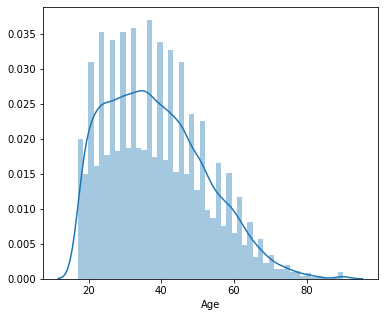

In [35]:
#using distibution plot to Age features
plt.figure(figsize = [6,5])
plt.xlabel("Age")
sns.distplot(data[["Age"]],kde = True)
plt.show()

The age features is right skewed between age 20 and 80.

Text(0.5, 0, 'Age')

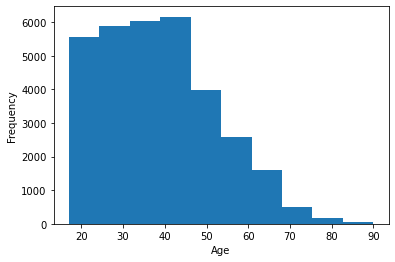

In [36]:
data["Age"].plot.hist()
plt.xlabel('Age')

Most of the individuals are from age group 20 to 50.

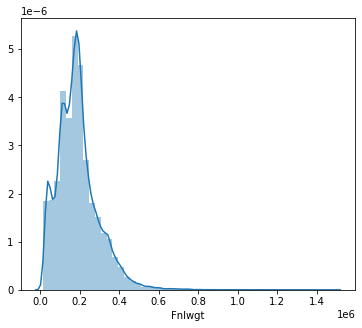

In [37]:
#using distibution plot to plot Fnlwgt continous features
plt.figure(figsize = [6,5])
plt.xlabel("Fnlwgt")
sns.distplot(data[["Fnlwgt"]],kde = True)
plt.show()

Text(0.5, 0, 'Fnlwgt')

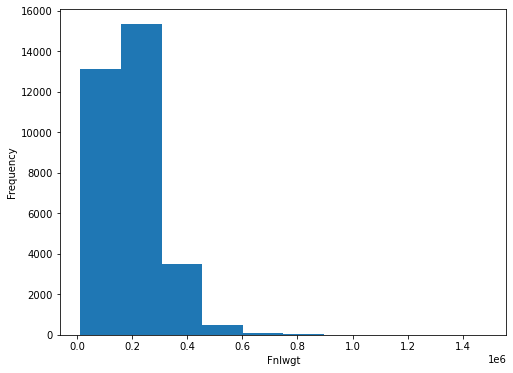

In [38]:
plt.figure(figsize = [8,6])
data["Fnlwgt"].plot.hist()
plt.xlabel("Fnlwgt")

The final weight ranges from 0.01* 10^6 to 0.3* 10^6.

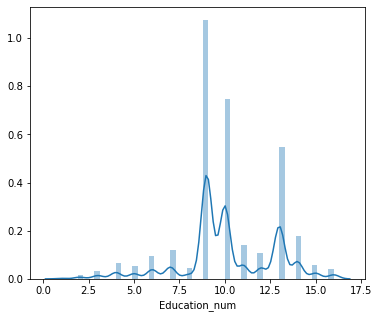

In [39]:
#using distibution plot to Education num these continous features
plt.figure(figsize = [6,5])
plt.xlabel("Education_num")
sns.distplot(data[["Education_num"]],kde = True)
plt.show()

Text(0.5, 0, 'Education num')

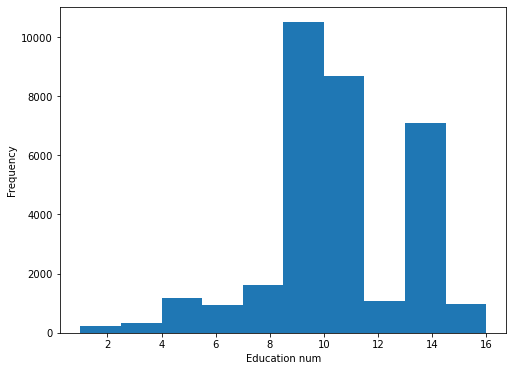

In [40]:
plt.figure(figsize = [8,6])
data["Education_num"].plot.hist()
plt.xlabel("Education num")

Most of the education number lies between 9 to 11 and 14.

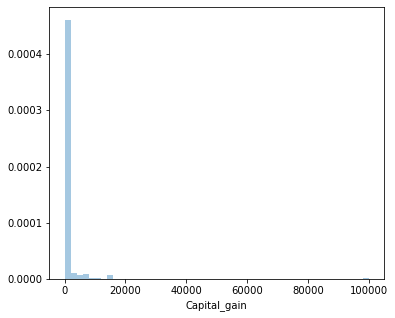

In [41]:
#using distibution plot to captain gain continous features
plt.figure(figsize = [6,5])
plt.xlabel("Capital_gain")
sns.distplot(data[["Capital_gain"]],kde = True)
plt.show()

Text(0.5, 0, 'Capital gain')

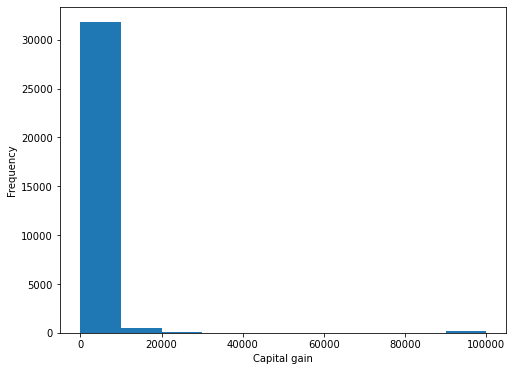

In [42]:
plt.figure(figsize = [8,6])
data["Capital_gain"].plot.hist()
plt.xlabel("Capital gain")

Most of the values of Capital gain lies between 0 to 10000.

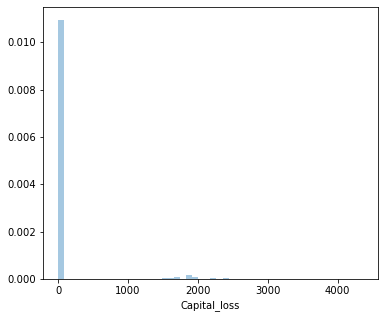

In [43]:
#using distibution plot to captain loss continous features
plt.figure(figsize = [6,5])
plt.xlabel("Capital_loss")
sns.distplot(data[["Capital_loss"]],kde = True)
plt.show()

Text(0.5, 0, 'Capital loss')

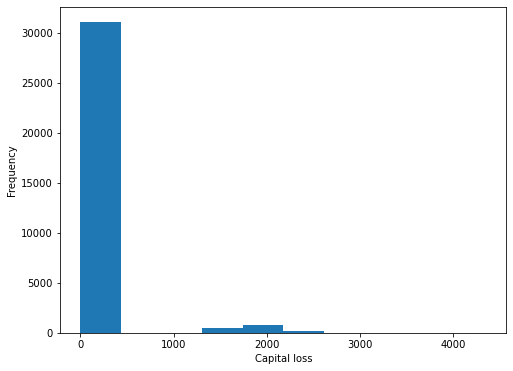

In [44]:
plt.figure(figsize = [8,6])
data["Capital_loss"].plot.hist()
plt.xlabel("Capital loss")

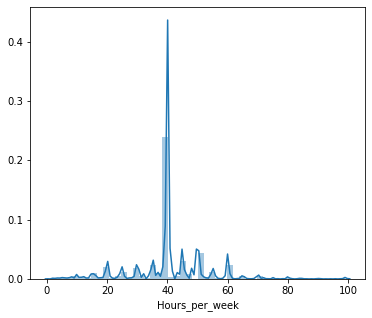

In [45]:
#using distibution plot to Hours_per_week continous features
plt.figure(figsize = [6,5])
plt.xlabel("Hours_per_week")
sns.distplot(data[["Hours_per_week"]],kde = True)
plt.show()

Text(0.5, 0, 'hours per week')

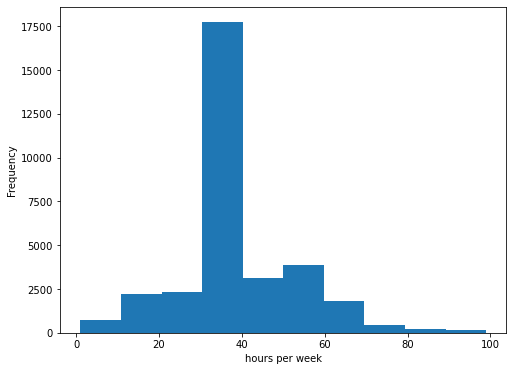

In [46]:
plt.figure(figsize = [8,6])
data["Hours_per_week"].plot.hist()
plt.xlabel("hours per week")

Most of the individuals work around 40 hours per week.

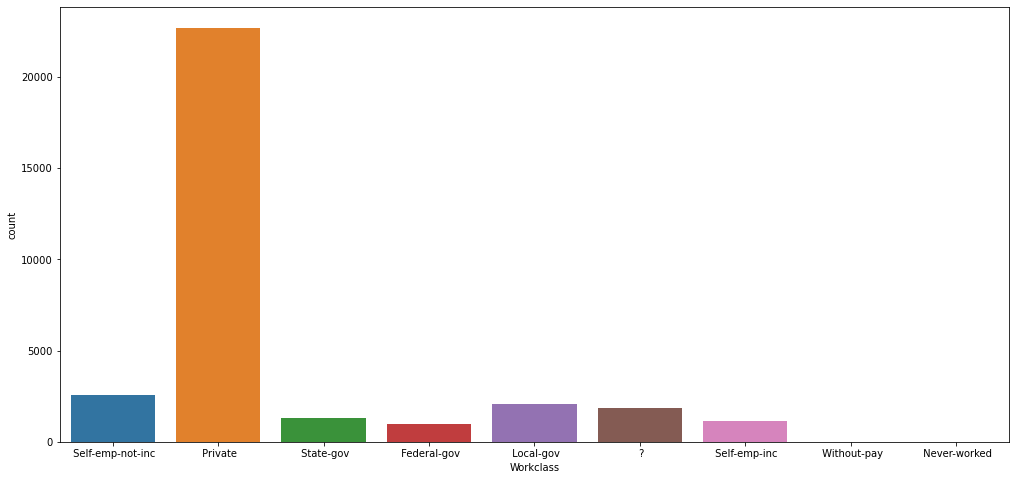

In [47]:
#using count plot for categorical features
plt.figure(figsize = [17,8])
sns.countplot(data['Workclass'])

Maximum number of the individuals work in a private workplace.

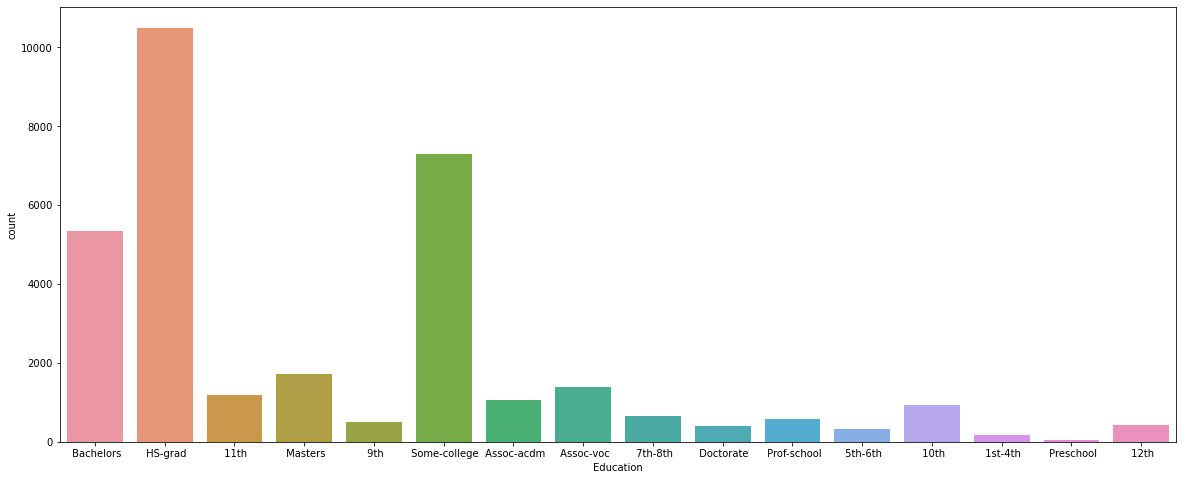

In [50]:
#using count plot for categorical features
plt.figure(figsize = [20,8])
sns.countplot(data['Education'])

observations: MOst of the individuals are either Bachelors ,High school graduates(HS - grad) or went to some-college.

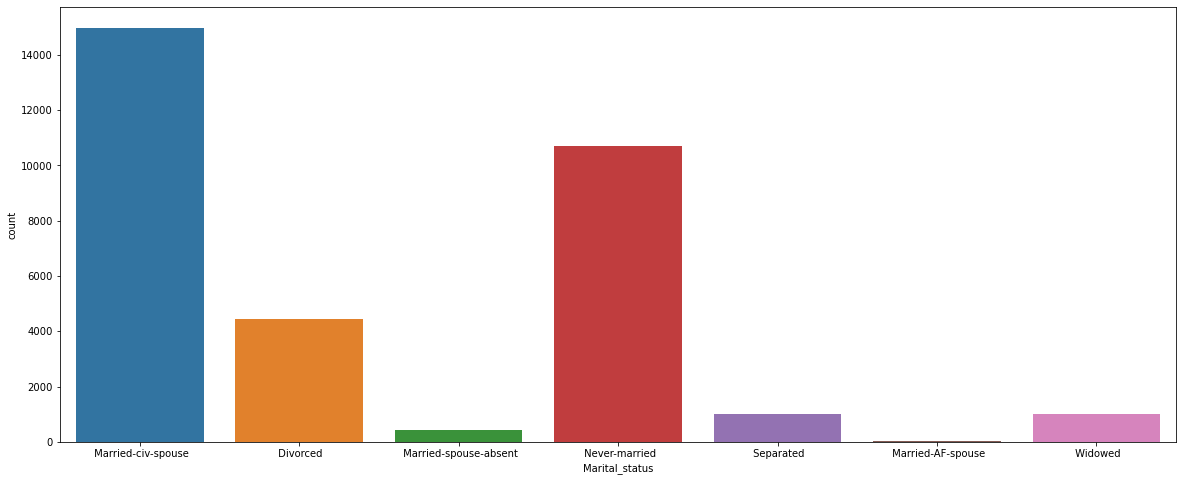

In [51]:
#using count plot for categorical features
plt.figure(figsize = [20,8])
sns.countplot(data['Marital_status'])

observation : Most of the individuals are married to a civilian spouse or never married.

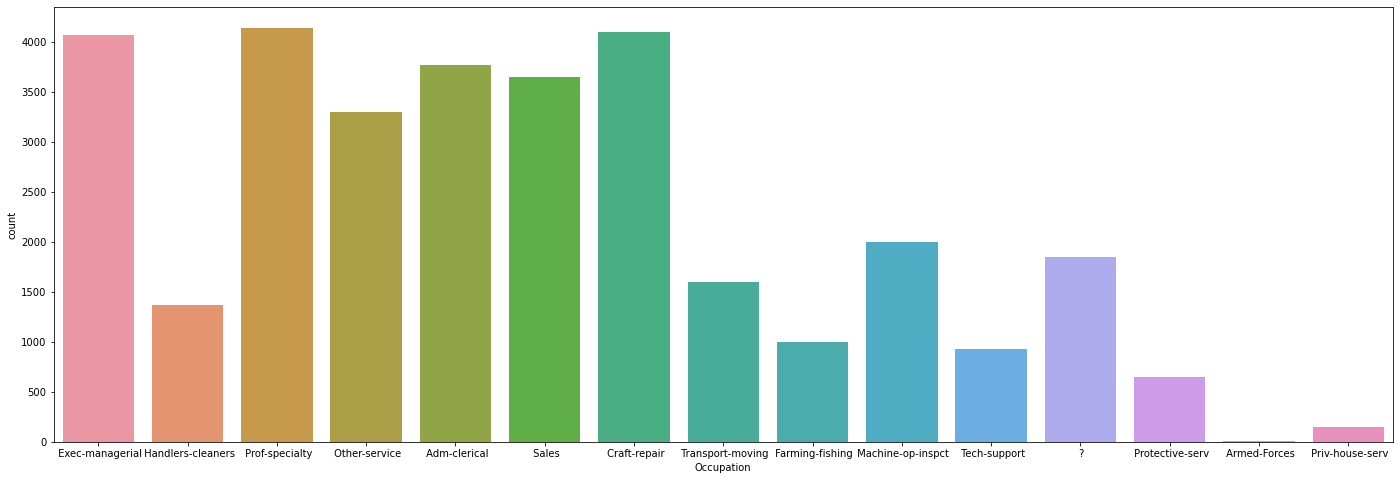

In [52]:
#using count plot for categorical features
plt.figure(figsize = [24,8])
sns.countplot(data['Occupation'])

Observation : The occupation of the individuals is diversed.we also observed that there are huge number of '?' present in this feature .  

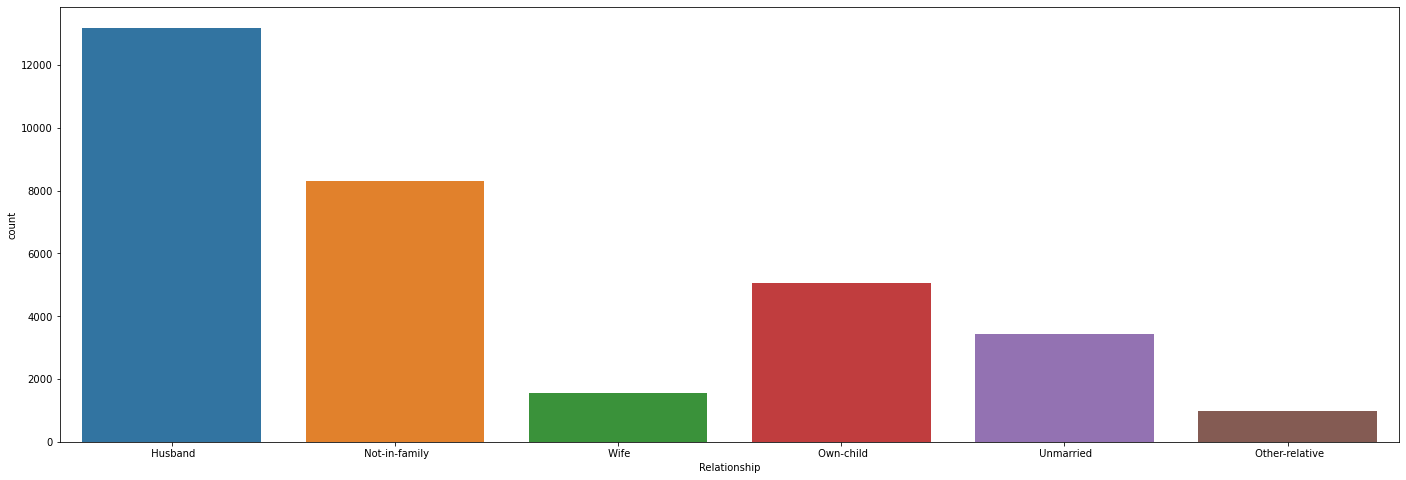

In [53]:
#using count plot for categorical features
plt.figure(figsize = [24,8])
sns.countplot(data['Relationship'])

Observation : Husbands is the most common relationship in the dataset.

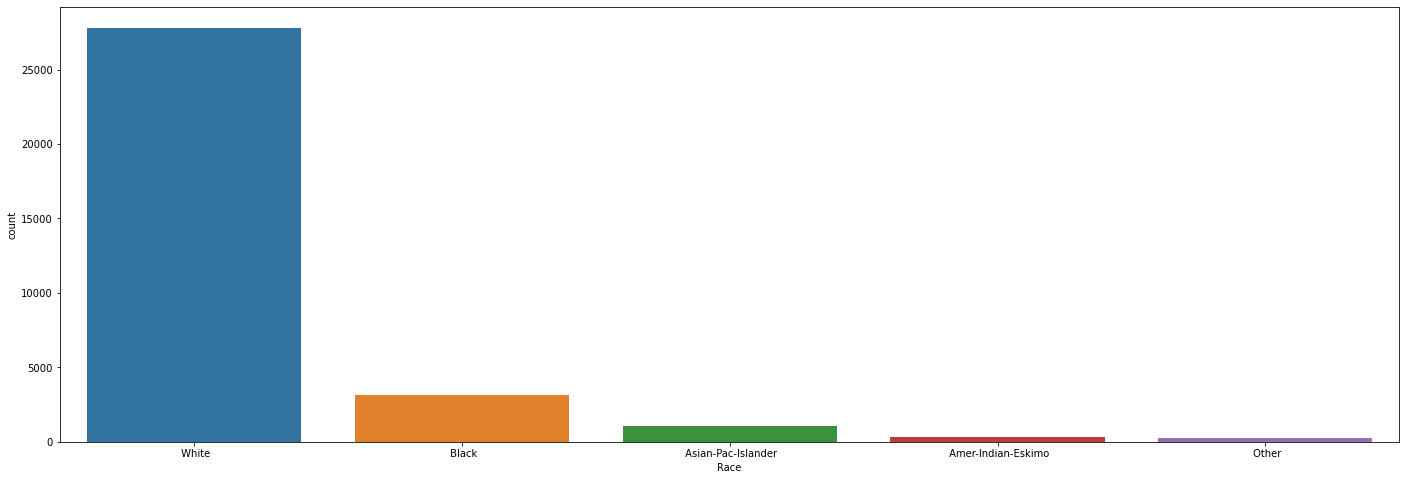

In [54]:
#using count plot for categorical features
plt.figure(figsize = [24,8])
sns.countplot(data['Race'])

Observations : most of the individuals belongs to white race community.

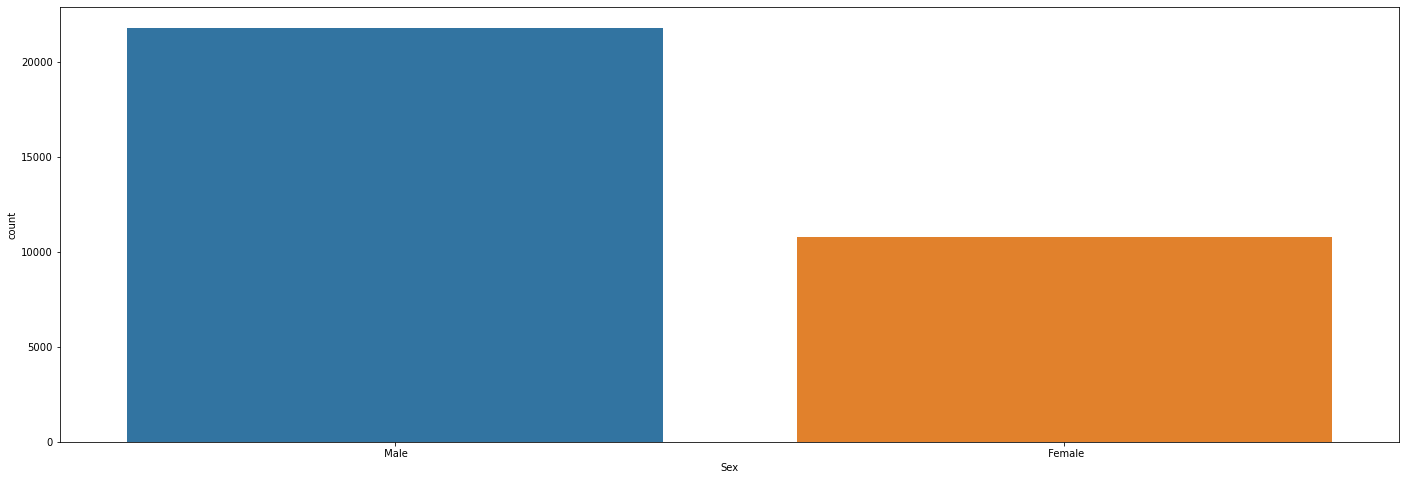

In [55]:
#using count plot for categorical features
plt.figure(figsize = [24,8])
sns.countplot(data['Sex'])

Observation : Females are half the number of Males.

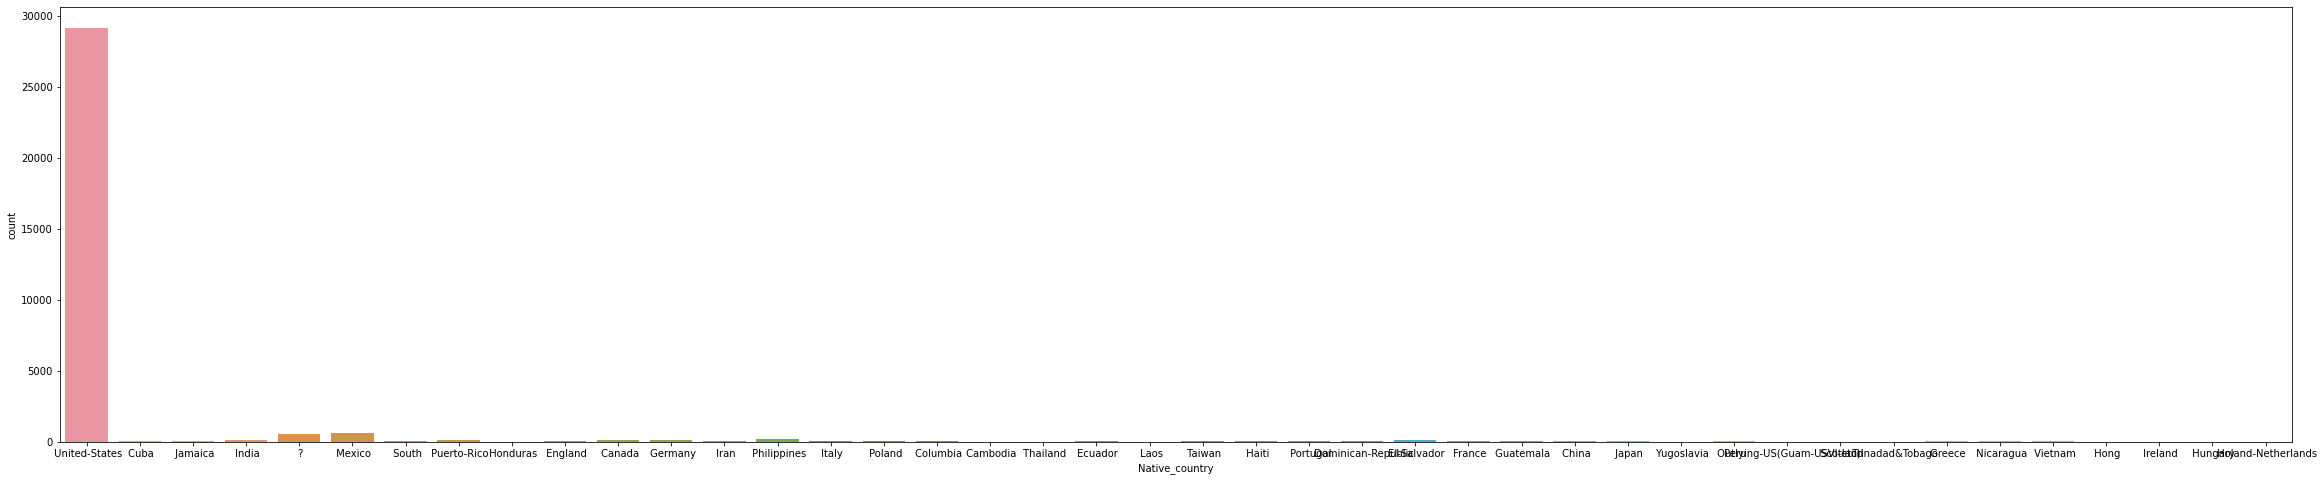

In [56]:
#using count plot for categorical features
plt.figure(figsize = [40,8])
sns.countplot(data['Native_country'])

observations : Maximum number of individuals are from United states i.e more than 25000

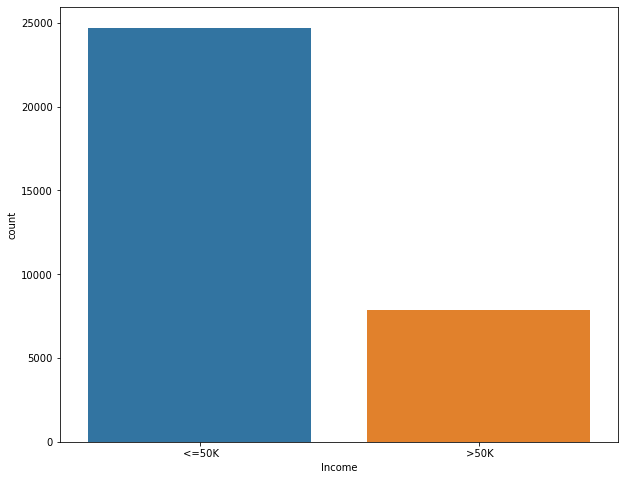

In [57]:
#using count plot for categorical features
plt.figure(figsize = [10,8])
sns.countplot(data['Income'])

observation: Here we can see that there is huge difference between the two values.the income of individuals <= 50k is very high as compared to >50k

In [58]:
#Now checking outliers from the continous features
data_continous

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

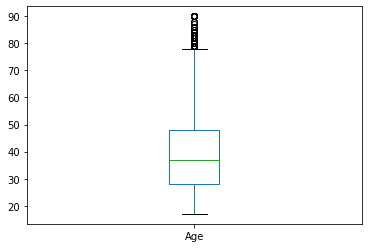

In [59]:
data['Age'].plot.box()

Observations : Outliers are present near upper whisker in the age.

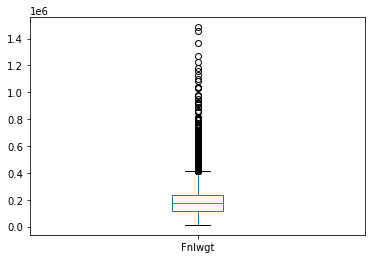

In [60]:
data['Fnlwgt'].plot.box()

Observations: As we can see that lots of outliers are present in the Fnlwgt feature.

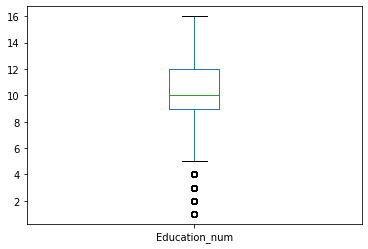

In [61]:
data['Education_num'].plot.box()

Observation : Few Outliers are present near the lowers whisker,i.e., less than the value of 5.

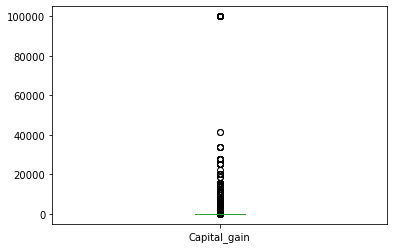

In [77]:
data['Capital_gain'].plot.box()

Observations : Huge number of outliers are present in the capital gain features.

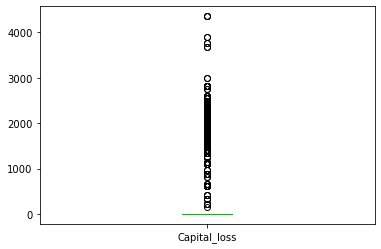

In [80]:
data['Capital_loss'].plot.box()

Observations : Huge number of outliers are present in the capital loss features.

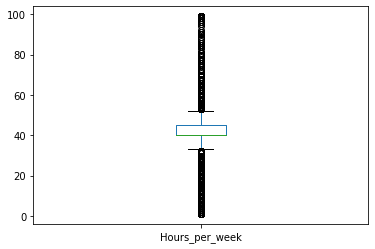

In [82]:
data['Hours_per_week'].plot.box()

In [62]:
data_cont = data[['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']]

Observations : outliers are present near both the upper and lower whisker in this feature.

In [63]:
#Now we'll be removing outliers from the above features using Zscore
from scipy.stats import zscore
z = np.abs(zscore(data_cont))
threshold = 3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [64]:
for i in data_cont:
    data[i] = data_cont[i]
#Here we used threshold value as 3 because at threshold value 3 the data loss is aroung 12 percent.
df_new = data[(z<4).all(axis = 1)]
df_new.shape

(31022, 15)

In [65]:
data_lose = ((data.shape[0] - df_new.shape[0])/data.shape[0])*100
data_lose

4.723587223587224

the data loss is around 4.72 percent after removing most of the outliers.

In [66]:
data_cat = df_new[['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']]

In [67]:
#converting the categorical features using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data_cat:
    df_new[i] = le.fit_transform(data_cat[i])

In [68]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,38,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,38,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,38,0


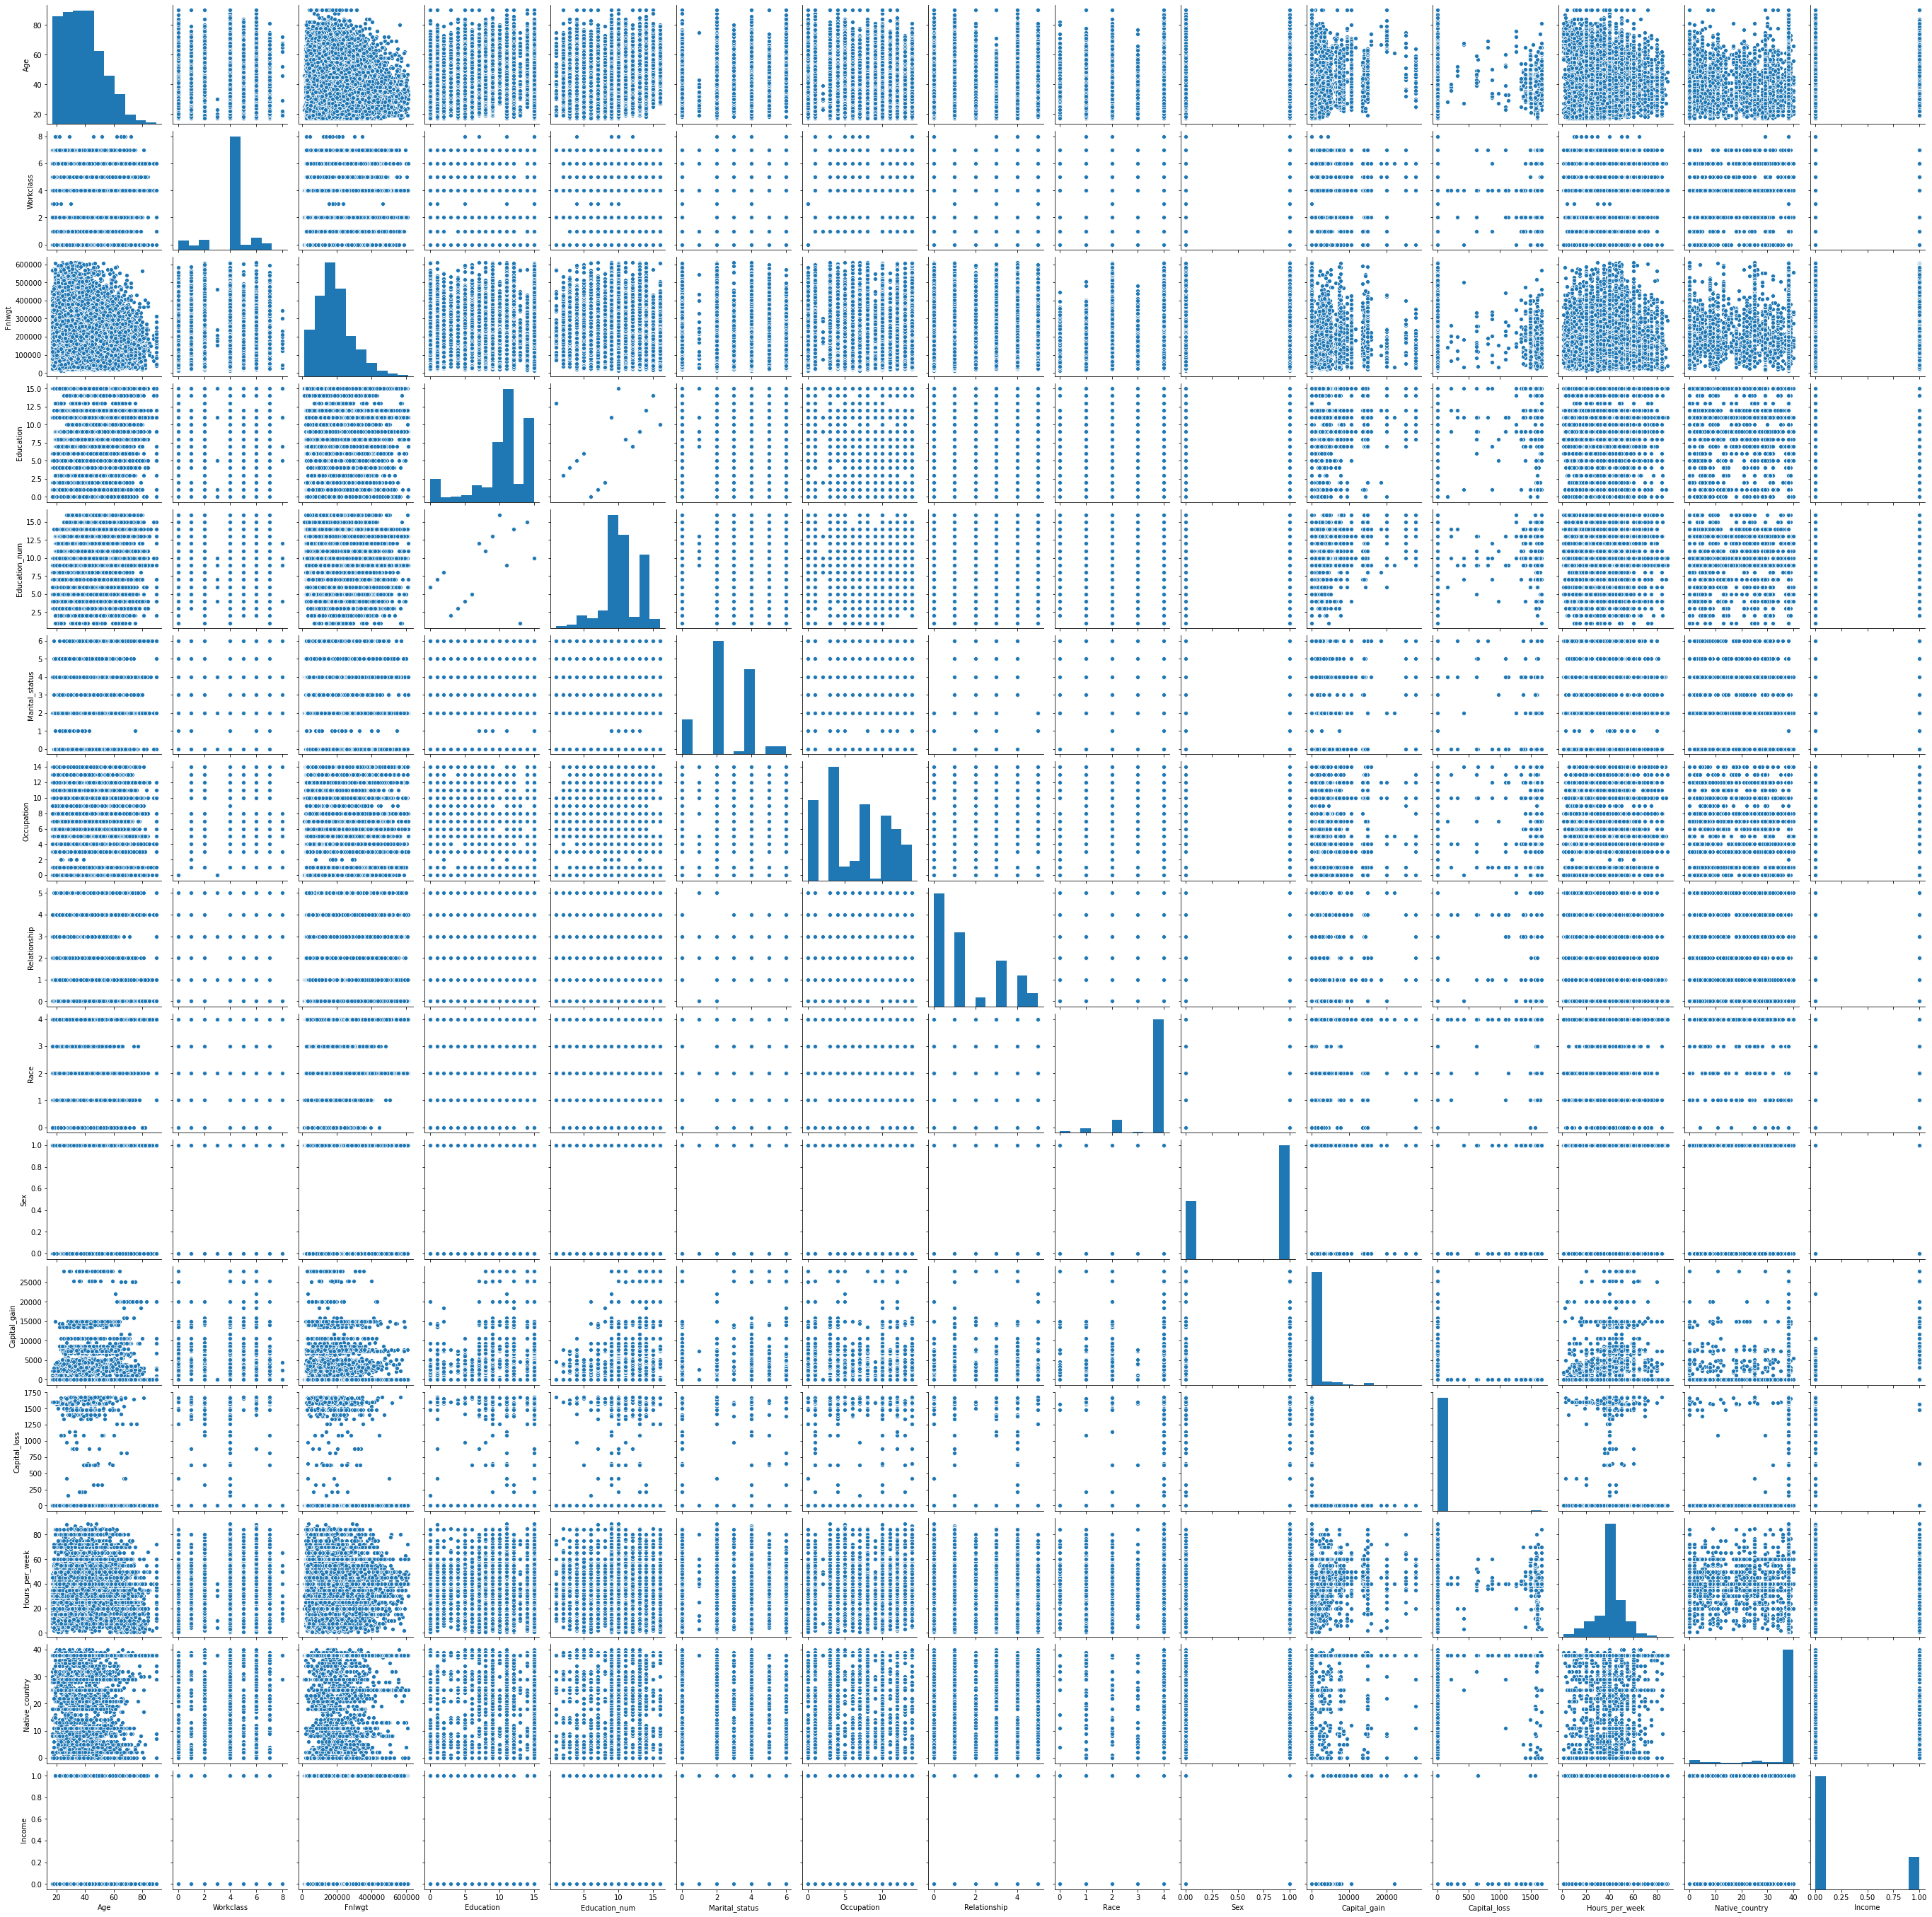

In [97]:
sns.pairplot(df_new)

No such trends can be seen between the features.Not much insights can be made from these plots

In [69]:
Scatter_plot = df_new.drop('Income',axis = 1)

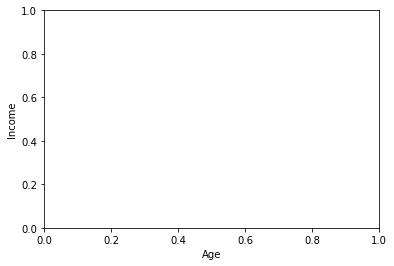

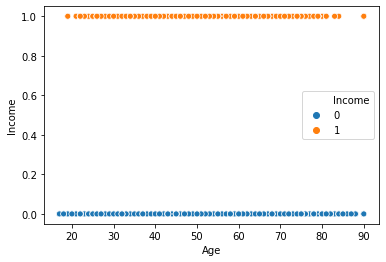

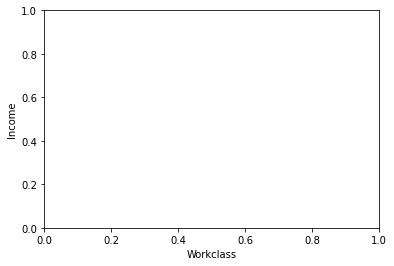

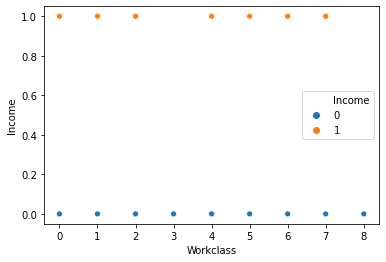

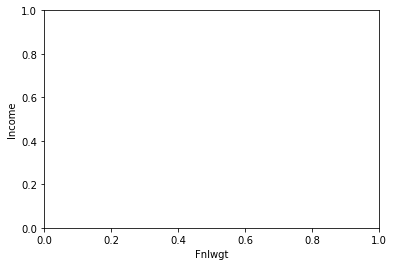

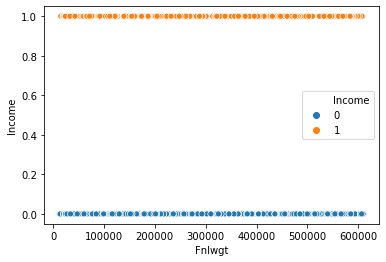

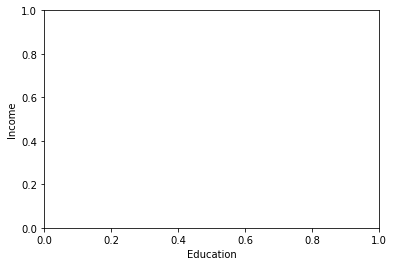

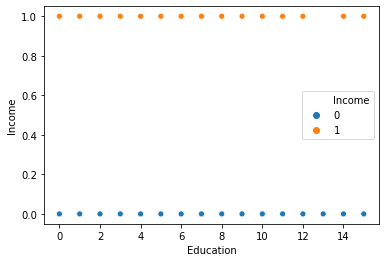

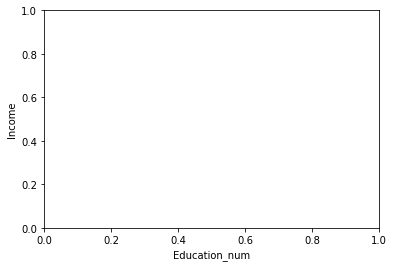

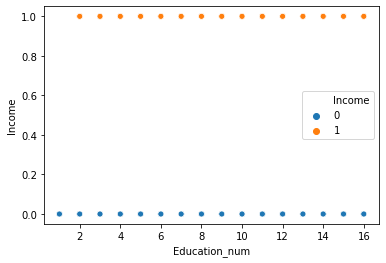

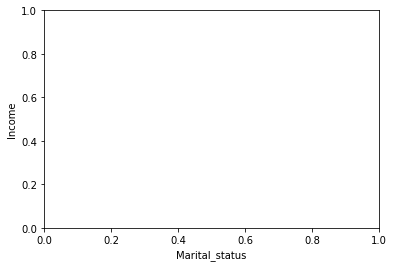

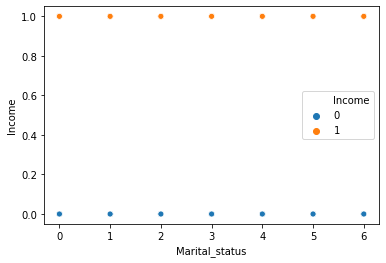

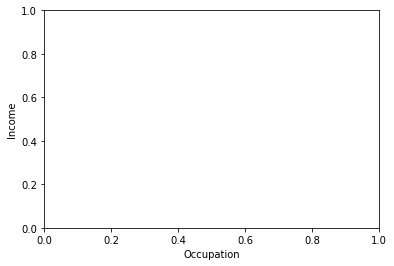

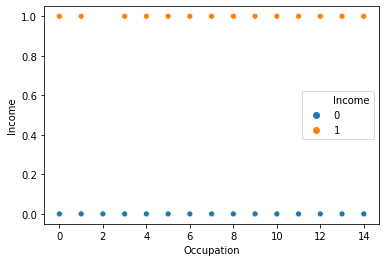

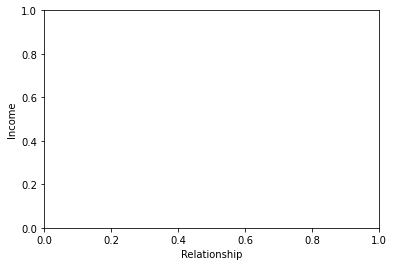

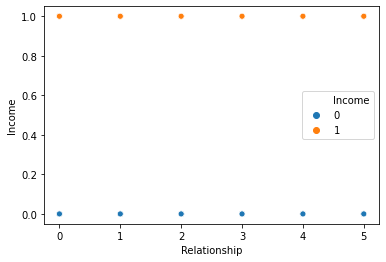

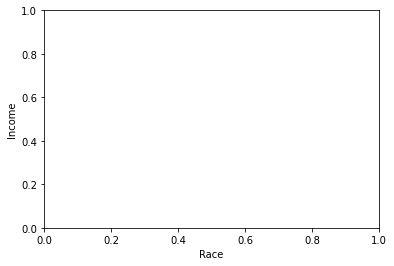

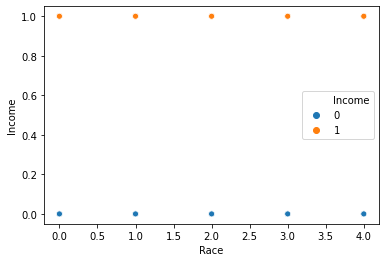

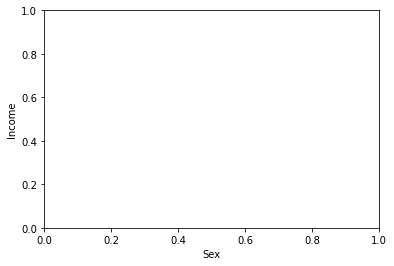

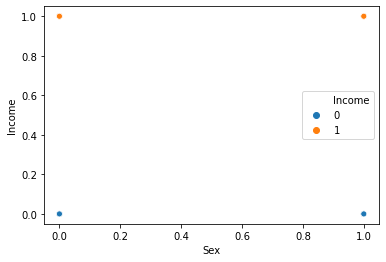

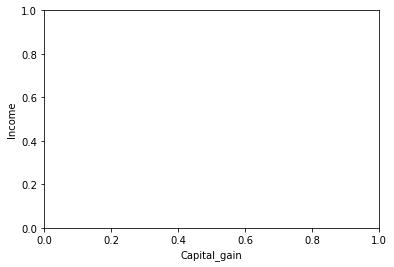

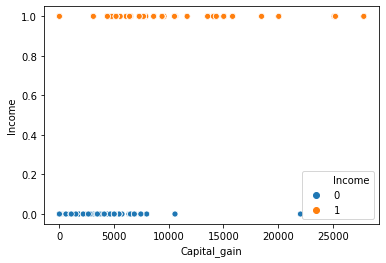

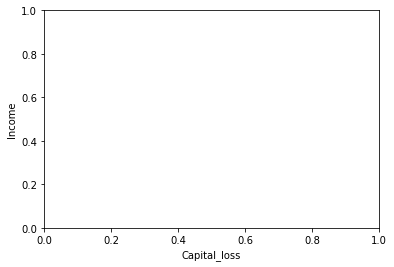

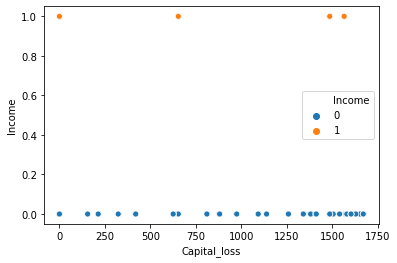

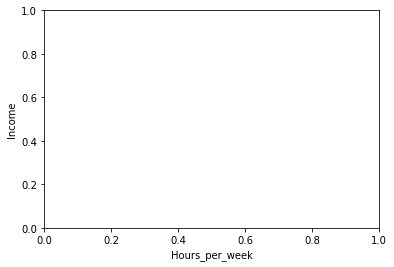

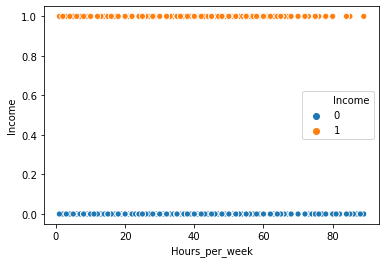

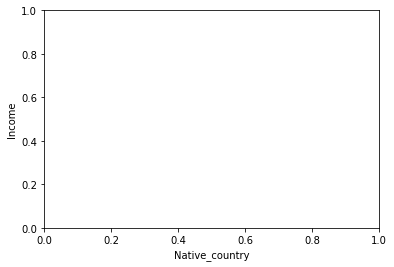

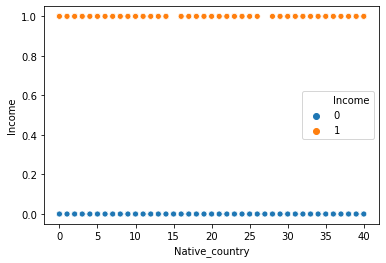

In [99]:
#plotting scatterplot against target feature.
for i in Scatter_plot:
    x = Scatter_plot[i]
    y = df_new["Income"]
    plt.xlabel(i)
    plt.ylabel("Income")
    plt.figure(figsize = [6,4])
    sns.scatterplot(x,y,hue = df_new['Income'])
    plt.show()

Observations : 
1. The individuals having salary greater than 50K has capital gain between 10,000 to 20,000
2. The individuals having salary greater than 50k has either capital loss 0, near to 600 ,

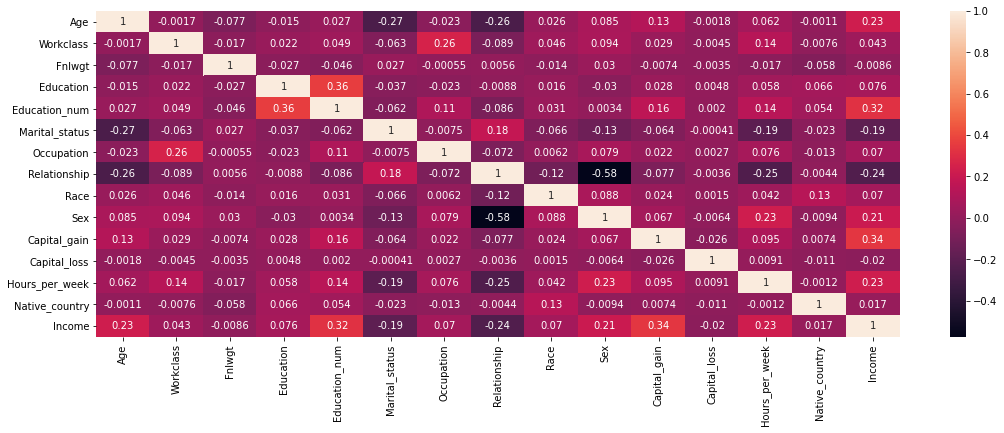

In [100]:
corr_matrix = df_new.corr()
plt.figure(figsize = [18,6])
sns.heatmap(corr_matrix,annot = True)

Observations: Age , education_num ,sex ,Capital_gain,sex and Hours_per_week are the features most co related to the target feature Income(Positively).
    Fnlwgt is least correlated to the target feature. and marital_statuss and Relationship are negatively correlated.

In [107]:
pd.DataFrame(corr_matrix['Income'].sort_values(ascending = False))

,Income
Income,1.000000
Capital_gain,0.340864
Education_num,0.317479
Hours_per_week,0.227593
Age,0.226108
Sex,0.207568
Education,0.075593
Occupation,0.069875
Race,0.069683
Workclass,0.042826


In [70]:
#checking for skewness in the features but first we'll seperate the data into x and y 
df_new.skew()

Age               0.573771
Workclass        -0.754695
Fnlwgt            0.827739
Education        -0.927398
Education_num    -0.325212
Marital_status   -0.040368
Occupation        0.120983
Relationship      0.754169
Race             -2.427886
Sex              -0.687943
Capital_gain      5.491679
Capital_loss      9.027705
Hours_per_week   -0.151088
Native_country   -3.625240
Income            1.332289
dtype: float64

In [71]:
x = df_new.drop('Income' , axis = 1)
y = df_new['Income']

In [72]:
#power transformer to remove skewness 
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
x['Fnlwgt'] = power.fit_transform(x[['Fnlwgt']])
x['Capital_gain'] = power.fit_transform(x[['Capital_gain']])
x['Capital_loss'] = power.fit_transform(x[['Capital_loss']])

In [73]:
x['Capital_gain'] = power.fit_transform(x[['Capital_gain']])
x['Capital_loss'] = power.fit_transform(x[['Capital_loss']])

In [74]:
x['Capital_gain'] = power.fit_transform(x[['Capital_gain']])
x['Capital_loss'] = power.fit_transform(x[['Capital_loss']])

In [75]:
x.skew()

Age               0.573771
Workclass        -0.754695
Fnlwgt           -0.017068
Education        -0.927398
Education_num    -0.325212
Marital_status   -0.040368
Occupation        0.120983
Relationship      0.754169
Race             -2.427886
Sex              -0.687943
Capital_gain      3.065093
Capital_loss      8.680933
Hours_per_week   -0.151088
Native_country   -3.625240
dtype: float64

In [76]:
x['Capital_gain'] = power.fit_transform(x[['Capital_gain']])
x['Capital_loss'] = power.fit_transform(x[['Capital_loss']])

In [77]:
x.skew()

Age               0.573771
Workclass        -0.754695
Fnlwgt           -0.017068
Education        -0.927398
Education_num    -0.325212
Marital_status   -0.040368
Occupation        0.120983
Relationship      0.754169
Race             -2.427886
Sex              -0.687943
Capital_gain      3.065093
Capital_loss      8.680933
Hours_per_week   -0.151088
Native_country   -3.625240
dtype: float64

since no further skewness can be removed from the capital_loss and capital_gain ,we'll try to make model with the help of fit.

In [78]:
#scaling the data 
#Using standard scaler to scale the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_cont = df_new[['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']]
for i in data_cont:
    x[i]= sc.fit_transform(data_cont[[i]])

In [79]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.849970,6,-1.053642,9,1.168411,2,4,0,4,1,-0.237568,-0.11132,-2.292381,38
1,-0.028431,4,0.281058,11,-0.402076,0,6,1,4,1,-0.237568,-0.11132,-0.002321,38
2,1.069571,4,0.473443,1,-1.187320,2,6,0,2,1,-0.237568,-0.11132,-0.002321,38
3,-0.760432,4,1.519216,9,1.168411,2,10,5,2,0,-0.237568,-0.11132,-0.002321,5
4,-0.101631,4,0.976330,12,1.561033,2,4,5,4,0,-0.237568,-0.11132,-0.002321,38


In [80]:
#balancing the target feature 
from imblearn.combine import SMOTETomek
from collections import Counter
os = SMOTETomek()

x_ns,y_ns = os.fit_resample(x,y)
print("The Number of classes before fit {} ".format(Counter(y)))
print("The Number of classes After fit {} ".format(Counter(y_ns)))

The Number of classes before fit Counter({0: 24110, 1: 6912}) 
The Number of classes After fit Counter({0: 23443, 1: 23443}) 


In [81]:
#checking the best random state for the model accuracy
from sklearn.linear_model import LogisticRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_ns,y_ns,test_size = .20,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    prdlr = lr.predict(x_test)
    accu = accuracy_score(y_test,prdlr)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.783109404990403 at random state :  197


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_ns,y_ns,test_size =.20,random_state = 197)

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print(accuracy_score(y_test,prdlr))
print(confusion_matrix(y_test,prdlr))
print(classification_report(y_test,prdlr))

0.783109404990403
[[3635 1060]
 [ 974 3709]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4695
           1       0.78      0.79      0.78      4683

    accuracy                           0.78      9378
   macro avg       0.78      0.78      0.78      9378
weighted avg       0.78      0.78      0.78      9378



Observation: The accuracy of the model is 78.31 percent .

The model Learning: Precision value(positive predictive value) for 0 is 79% whereas the Precision value for 1 is 78% .And recall(sensitivity) for 0 is 77% and recall value for 1 is 79%. Which means the performance of the model is good.

In [84]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

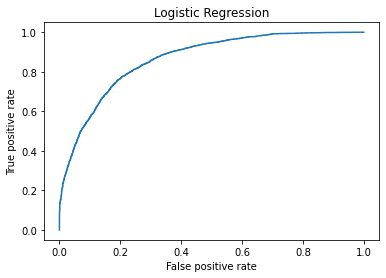

In [85]:
#plottig the aoc roc graph
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

as we can see that the area under the curve for Logistic Regression is around 80 of the xy plane,therefore, we can conclude that the model is learning efficiently.

In [91]:
#Using Random Forest Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
prdrfc = rfc.predict(x_test)
print(accuracy_score(y_test,prdrfc))
print(confusion_matrix(y_test,prdrfc))
print(classification_report(y_test,prdrfc))

0.9105352953721476
[[4209  486]
 [ 353 4330]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4695
           1       0.90      0.92      0.91      4683

    accuracy                           0.91      9378
   macro avg       0.91      0.91      0.91      9378
weighted avg       0.91      0.91      0.91      9378



Observation: The accuracy of the model is 91.14 percent .

The model Learning: Precision value(positive predictive value) for 0 is 92% whereas the Precision value for 1 is also 90% .And recall(sensitivity) for 0 is 90% and recall value for 1 is 93%. Which implies model is highly efficient.

In [134]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

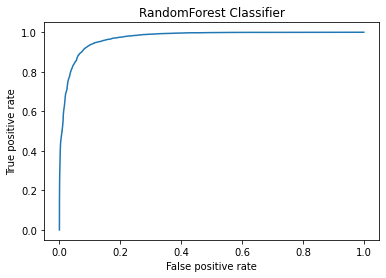

In [135]:
#plottig the aoc roc graph
plt.plot(fpr,tpr,label = 'RandomForest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForest Classifier')
plt.show()

as we can see that the area under the curve for RandomForest Classifier is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is efficiently.

In [87]:
#Using DecisionTree Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print(accuracy_score(y_test,prdtc))
print(confusion_matrix(y_test,prdtc))
print(classification_report(y_test,prdtc))

0.8584986137769247
[[4002  693]
 [ 634 4049]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4695
           1       0.85      0.86      0.86      4683

    accuracy                           0.86      9378
   macro avg       0.86      0.86      0.86      9378
weighted avg       0.86      0.86      0.86      9378



Observation: The accuracy of the model is 85.8 percent .

The model Learning: Precision value(positive predictive value) for 0 is 86% whereas the Precision value for 1 is also 85% .And recall(sensitivity) for 0 is 85% and recall value for 1 is 86%. Which implies model is highly efficient.

In [88]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

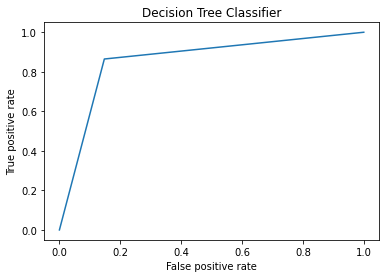

In [89]:
plt.plot(fpr,tpr,label = 'Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

as we can see that the area under the curve for decision tree clasiifier is around 85 of the xy plane,therefore, we can conclude that the model is learning efficiently.

In [93]:
#using boosting technique to build model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
prdgbc = gbc.predict(x_test)
print(accuracy_score(y_test,prdgbc))
print(confusion_matrix(y_test,prdgbc))
print(classification_report(y_test,prdgbc))

0.8683088078481552
[[3916  779]
 [ 456 4227]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4695
           1       0.84      0.90      0.87      4683

    accuracy                           0.87      9378
   macro avg       0.87      0.87      0.87      9378
weighted avg       0.87      0.87      0.87      9378



Observation: The accuracy of the model is 86.83 percent .

The model Learning: Precision value(positive predictive value) for 0 is 90% whereas the Precision value for 1 is also 84% .And recall(sensitivity) for 0 is 83% and recall value for 1 is 90%. Which implies model is highly efficient.

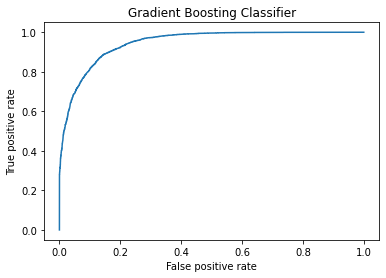

In [97]:
y_pred_prob = gbc.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label = 'Gradient Boosting Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()

as we can see that the area under the curve for Gradient boosting clasiifier is quite high on the xy plane,therefore, we can conclude that the model is learning efficiently.

In [99]:
#using gausian NB to build model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
prdgnb = gnb.predict(x_test)
print(accuracy_score(y_test,prdgnb))
print(confusion_matrix(y_test,prdgnb))
print(classification_report(y_test,prdgnb))

0.7885476647472809
[[3895  800]
 [1183 3500]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4695
           1       0.81      0.75      0.78      4683

    accuracy                           0.79      9378
   macro avg       0.79      0.79      0.79      9378
weighted avg       0.79      0.79      0.79      9378



Observation: The accuracy of the model is 78.85 percent .

The model Learning: Precision value(positive predictive value) for 0 is 77% whereas the Precision value for 1 is also 81% .And recall(sensitivity) for 0 is 83% and recall value for 1 is 75%. Which implies model efficiency is good.

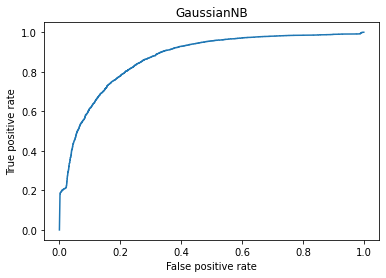

In [101]:
y_pred_prob = gnb.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label = 'GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.show()

as we can see that the area under the curve for GausianNB is also high on the xy plane,but we observed that there is a break near 0.2 . further, we concluded that the model is good.

Since most of the model shows different accuracy, we are not sure that these accuracies are final accuracy of the models.So, we'll check cross validation score of each model.

In [103]:
#using cross validation score to check the actual learning of models

In [104]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x_ns,y_ns,cv = 5)
print("Cross validation score of Logistic Regression is ",scr.mean())

Cross validation score of Logistic Regression is  0.7712110666408939


In [105]:
scr = cross_val_score(dtc,x_ns,y_ns,cv = 5)
print("Cross validation score of Decision tree classifier is ",scr.mean())

Cross validation score of Decision tree classifier is  0.8568670369159662


In [106]:
scr = cross_val_score(rfc,x_ns,y_ns,cv = 5)
print("Cross validation score of Random Forest classifier is ",scr.mean())

Cross validation score of Random Forest classifier is  0.908502356207373


In [107]:
scr = cross_val_score(gbc,x_ns,y_ns,cv = 5)
print("Cross validation score of Gradient Boosting classifier is ",scr.mean())

Cross validation score of Gradient Boosting classifier is  0.8642673354870901


In [108]:
scr = cross_val_score(gnb,x_ns,y_ns,cv = 5)
print("Cross validation score of Gaussian NB is ",scr.mean())

Cross validation score of Gaussian NB is  0.7828350692592988


Conclusion: From the above cross validation scores of different models we conclude that Random forest classifier shows minimum difference between the actual score and the cross validation score score.So we can choose Random forest classifier.


In [109]:
#doing Hyperparameter tuning of random forest
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in GridSearchCV
parameters = {'n_estimators' : [10,100],
              'criterion': ['gini','entropy'],
             'max_features': ['auto','sqrt','log2']}

In [110]:
GVC = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]})

In [111]:
#checking the best parameters
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

In [116]:
#using the parameters in random forest classifier to create model
modrfc = RandomForestClassifier(criterion = 'entropy',max_features = 'sqrt',n_estimators = 100,random_state = 137)
modrfc.fit(x_train,y_train)
pred = modrfc.predict(x_test)
print("accuracy score of the model is :",accuracy_score(y_test,pred)*100)

accuracy score of the model is : 91.16016208146726


In [117]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[4213  482]
 [ 347 4336]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4695
           1       0.90      0.93      0.91      4683

    accuracy                           0.91      9378
   macro avg       0.91      0.91      0.91      9378
weighted avg       0.91      0.91      0.91      9378



In [118]:
#checking the accuracy of the model.
conclusion = pd.DataFrame([modrfc.predict(x_test)[:],prdrfc[:]],index = ["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9368,9369,9370,9371,9372,9373,9374,9375,9376,9377
predicted,1,1,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
original,1,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [119]:
#saving the model using jobib
import joblib
joblib.dump(modrfc,"Census income.pkl")

['Census income.pkl']